# PCA on wine quality data
We like this data, because it is all numeric data.
It looks like this

```
"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5
```

Check data in *datasets/wine-quality*
- winequality-red.csv
- winequality-white.csv

## Step 1 : Load Data

In [1]:
import os
import urllib.request

## red wine
data_location = '../data/wine-quality/winequality-red.csv'
data_url = 'https://elephantscale-public.s3.amazonaws.com/data/wine-quality/winequality-red.csv'

## white wine
# data_location= '../data/wine-quality/winequality-white.csv'
# data_location =  'https://elephantscale-public.s3.amazonaws.com/data/wine-quality/winequality-white.csv'

if not os.path.exists (data_location):
    data_location = os.path.basename(data_location)
    if not os.path.exists(data_location):
        print("Downloading : ", data_url)
        urllib.request.urlretrieve(data_url, data_location)
print('data_location:', data_location)



data_location: winequality-red.csv


In [2]:
import pandas as pd

dataset = pd.read_csv(data_location, sep=";")
dataset = dataset.dropna()
dataset.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1030,7.1,0.59,0.00,2.1,0.091,9.0,14.0,0.99488,3.42,0.55,11.5,7
923,6.8,0.41,0.31,8.8,0.084,26.0,45.0,0.99824,3.38,0.64,10.1,6
1595,5.9,0.55,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1233,10.2,0.23,0.37,2.2,0.057,14.0,36.0,0.99614,3.23,0.49,9.3,4
1451,7.8,0.32,0.44,2.7,0.104,8.0,17.0,0.99732,3.33,0.78,11.0,7
1284,7.0,0.42,0.19,2.3,0.071,18.0,36.0,0.99476,3.39,0.56,10.9,5
1538,6.2,0.64,0.09,2.5,0.081,15.0,26.0,0.99538,3.57,0.63,12.0,5
577,8.8,0.44,0.49,2.8,0.083,18.0,111.0,0.99820,3.30,0.60,9.5,5
979,12.2,0.45,0.49,1.4,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5
546,7.5,0.55,0.24,2.0,0.078,10.0,28.0,0.99830,3.45,0.78,9.5,6


## Step 2 : Basic data analysis

In [3]:
column_to_remove = 'quality'

dataset2 = dataset.drop(column_to_remove, axis=1)

print("original data columns  ", len(dataset.columns))

features = list(dataset2)
print("features: " + str(features))
dataset2

original data columns   12
features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [4]:
## basic data analytics
dataset2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


## Step 3 : Create feature vector

In [5]:
feature_vector = dataset2
feature_vector

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


## Step 4 : Correlation Matrix of original data
Do see any correlation?

Which columns have the strongest correlation (positive or negative) with
quality?

Write some python code that will find and rank all columns by correlation.

In [16]:
def  show_Correlation_of_lables ( dset, target ) :
  import matplotlib.pyplot as plt
  import seaborn as sns
  plt.style.use(style='ggplot')
  plt.rcParams['figure.figsize'] = (10, 6)
  print("\nFinding correlation between features \n")
  # Finding the relations between the variables.
  hd_corr_matrix= dset.corr()
  print ( "All feature correlation values \n", hd_corr_matrix)

  target_corr = hd_corr_matrix[target]


  print ( "\Target correlation with other features\n",  target_corr.sort_values(ascending=False))

  print ( "\nTop 6 features positively impacted target \n" ,  hd_corr_matrix[target].sort_values(ascending=False)[:6], '\n')
  print ( "\nBottom 6 features negatively impacted target \n" , hd_corr_matrix[target].sort_values(ascending=False)[-6:])

  for k,v in target_corr.items():
      if(abs(v) > 0.01) and k != target:
          neg = ''
          if(v < 0):
              neg = 'negative '
          print(f'\nThe {k} aspect shows {(v ** 2) * 100:.2f}% {neg}influence on the targer')
  print ( 'Show Correlation Matrix between features \n')
  fig, ax = plt.subplots(figsize=(15,8))         # Sample figsize in inches

  sns.heatmap(hd_corr_matrix,cmap="BrBG",annot=True, ax=ax)
  plt.show()

  target_corr = target_corr.drop(labels=[target])
  # Plot a bar chart to show the influence factors
  sns.set(palette="deep", rc={"figure.figsize": [7, 3]})
  target_corr.plot(kind='barh')


Finding correlation between features 

All feature correlation values 
                       fixed acidity  volatile acidity  ...   alcohol   quality
fixed acidity              1.000000         -0.256131  ... -0.061668  0.124052
volatile acidity          -0.256131          1.000000  ... -0.202288 -0.390558
citric acid                0.671703         -0.552496  ...  0.109903  0.226373
residual sugar             0.114777          0.001918  ...  0.042075  0.013732
chlorides                  0.093705          0.061298  ... -0.221141 -0.128907
free sulfur dioxide       -0.153794         -0.010504  ... -0.069408 -0.050656
total sulfur dioxide      -0.113181          0.076470  ... -0.205654 -0.185100
density                    0.668047          0.022026  ... -0.496180 -0.174919
pH                        -0.682978          0.234937  ...  0.205633 -0.057731
sulphates                  0.183006         -0.260987  ...  0.093595  0.251397
alcohol                   -0.061668         -0.202288  ...

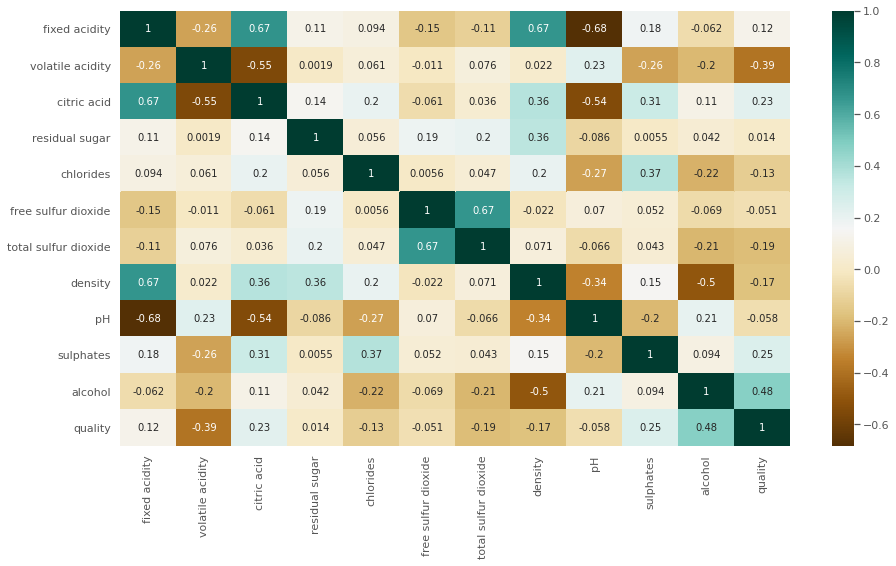

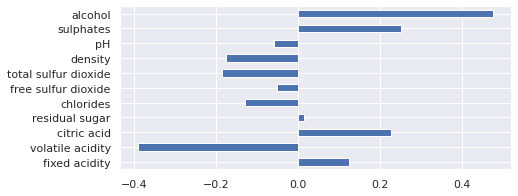

In [17]:
##dataset2.corr()

## TODO: Rank columns by correlation

show_Correlation_of_lables ( dataset , column_to_remove)

## Step 5 : Scale Data
We need to scale data before PCA

In [18]:
feature_vector = (feature_vector - feature_vector.mean()) / feature_vector.std()
feature_vector

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217415,0.403103,-0.980362,-0.382151,0.053829,1.541571,-0.075020,-0.978459,0.899605,-0.461036,0.072271
1595,-1.389721,0.123866,-0.877693,-0.240300,-0.541090,2.210777,0.137777,-0.861893,1.353012,0.600867,0.729136
1596,-1.159980,-0.099523,-0.723690,-0.169374,-0.243630,1.254769,-0.196617,-0.533387,0.705287,0.541872,0.541460
1597,-1.389721,0.654416,-0.775024,-0.382151,-0.264878,1.541571,-0.075020,-0.676446,1.676875,0.305894,-0.209243


## Step 6 : Do PCA

In [19]:
# numver of principal components 
num_pc = 5

from sklearn.decomposition import PCA

pca = PCA(n_components = num_pc)
pca.fit(feature_vector)
transformed_v = pca.transform(feature_vector)
transformed_v_df = pd.DataFrame(transformed_v, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
transformed_v_df

,PC1,PC2,PC3,PC4,PC5
0,-1.619023,0.450809,-1.773899,0.043727,0.066994
1,-0.798920,1.855972,-0.911405,0.547895,-0.018386
2,-0.748245,0.881763,-1.171028,0.410892,-0.043517
3,2.356935,-0.269892,0.243413,-0.928160,-1.498680
4,-1.619023,0.450809,-1.773899,0.043727,0.066994
...,...,...,...,...,...
1594,-2.149828,0.814031,0.616870,0.407559,-0.240861
1595,-2.213804,0.892822,1.806837,0.413874,0.119555
1596,-1.455674,0.311648,1.123888,0.491723,0.193655
1597,-2.269808,0.979485,0.627768,0.639570,0.067714


## Step 7 : Correlation Matrix for Principal Components
These should be very small (close to zero!)

In [20]:
transformed_v_df.corr().round(3)

,PC1,PC2,PC3,PC4,PC5
PC1,1.0,0.0,0.0,-0.0,0.0
PC2,0.0,1.0,-0.0,-0.0,0.0
PC3,0.0,-0.0,1.0,-0.0,-0.0
PC4,-0.0,-0.0,-0.0,1.0,0.0
PC5,0.0,0.0,-0.0,0.0,1.0


## Step 8 : Calculate PC Variance

We started with 5 PCs.  
How much coverage (variance) are we getting?

Play with **num_pc** in Step-6 to get 90% coverage


In [21]:
import numpy as np

## variance
variance = pca.explained_variance_ratio_
print(variance)
print ("Original data had {} features,  principal components {}".format(len(dataset2.columns), num_pc))
print("Cumulative Explained Variance: " + str(np.cumsum(variance)[-1]))

[0.28173931 0.1750827  0.1409585  0.11029387 0.08720837]
Original data had 11 features,  principal components 5
Cumulative Explained Variance: 0.7952827473610349


## Step 9 : Screeplot
Screeplot goes from 0.0  to 1.0

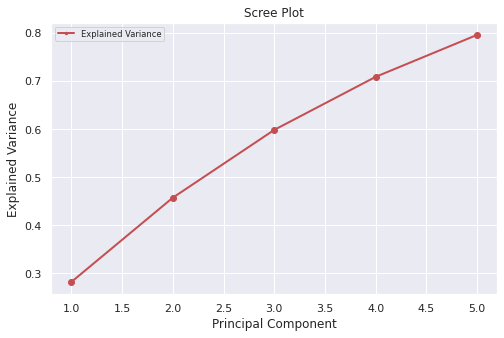

In [22]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_pc) + 1
plt.plot(np.arange(num_pc) + 1, np.cumsum(variance), 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')


leg = plt.legend(['Explained Variance'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)

In [23]:

for x in range(0,5):
    # Let's get the top components of PC1:
    print("top components of PC" + str(x+1) + ":")
    rel_values = np.abs(pca.components_[x])/np.sum(np.abs(pca.components_[x]))
    print("Feature Names: " + str([features[i] for i in np.argsort(-rel_values)[:3]]))
    print("Percentages: " + str(rel_values[np.argsort(-rel_values)[:3]]))
    print()

top components of PC1:
Feature Names: ['fixed acidity', 'citric acid', 'pH']
Percentages: [0.1747774  0.16560389 0.15663416]

top components of PC2:
Feature Names: ['total sulfur dioxide', 'free sulfur dioxide', 'alcohol']
Percentages: [0.2105755  0.18989827 0.14279563]

top components of PC3:
Feature Names: ['alcohol', 'volatile acidity', 'free sulfur dioxide']
Percentages: [0.16238591 0.15491143 0.14762322]

top components of PC4:
Feature Names: ['chlorides', 'sulphates', 'residual sugar']
Percentages: [0.28271254 0.23377327 0.15820169]

top components of PC5:
Feature Names: ['residual sugar', 'alcohol', 'pH']
Percentages: [0.26902899 0.12885912 0.09830475]



## Step 10 : Biplot

Let's reduce dimensions down to 2 dimensions, and then we can do our biplot.  A biplot plots 2 PCA'ed dimensions, and then also projects the original feature vector onto those two axes.  This helps us see and visualize how the principal components are related to the original features.

In [24]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def biplot(score,coeff,y,labels=None):
    plt.rcParams['figure.figsize'] = [15, 10]
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-0.6,0.8)
    plt.ylim(-0.6,0.8)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

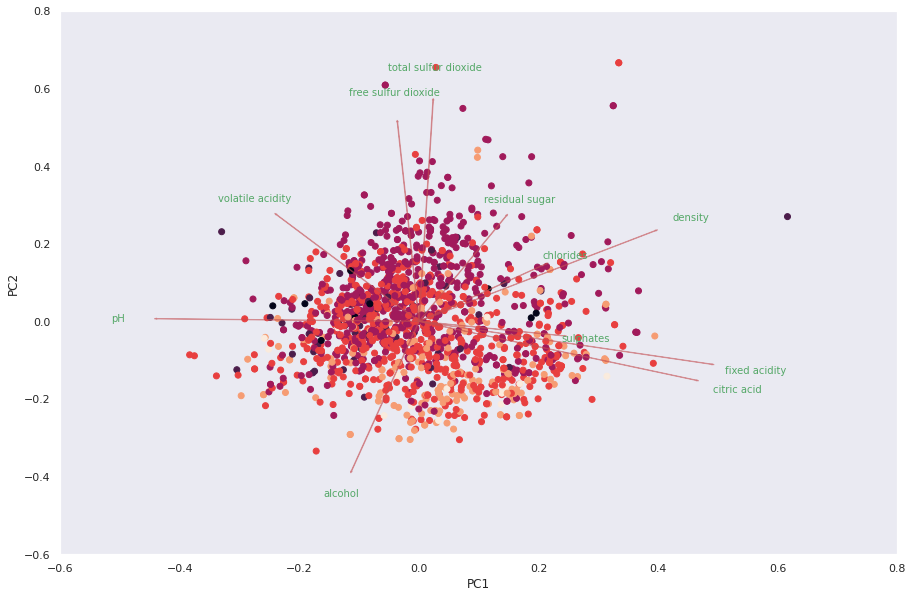

In [25]:
from sklearn.decomposition import PCA

pca_2d = PCA(n_components = 2)

x_new = pca_2d.fit_transform(feature_vector)


# Let's do a biplot of a PCA = 2 dimensions
biplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]),dataset['quality'],labels=features)


### Interpret biplot

What does the biplot tell us?  Of the two principal components, which of the original features is strongly captured in PC1?  What about PC2?